In [1]:
import pandas as pd
from pathlib import Path

In [2]:
file = Path("pred_output") / "pred_set_6m.csv"

In [3]:
df_pred = pd.read_csv(file)
df_pred.head()

/home/seba/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (34,45,47,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,NUM_SECU_EXPED,cond_04,cond_05,cond_06,cond_09,cond_11,cond_12,cond_32,cond_37,...,FECHA_DESDE,FECHA_NACIMIENTO,SEXO_ASEG,TIPO_ACTIVIDAD,CLIENTE,DOMICILIO_CODIGO_POSTAL,HABILITADO,DATECO_TIPO_ACTIVIDAD,CODIGO_NACION,prediction
0,0,1905896179999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011044
1,1,1905896259999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000779
2,2,1905896279999,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005100
3,3,1905896299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001064
4,4,1905896309999,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,2015-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001759


In [4]:
df_pred["FECHA_SINI"] = pd.to_datetime(df_pred["FECHA_SINI"], format="%Y/%m/%d")
df_pred["mes"] = df_pred["FECHA_SINI"].dt.month

In [5]:
df_pred = df_pred[(df_pred["mes"] < 5) & (df_pred["FECHA_SINI"].dt.year == 2019)]

In [6]:
df_pred["mes"].value_counts()

3    37608
1    35451
4    34658
2    34205
Name: mes, dtype: int64

In [7]:
file = Path("input_dataset")/ "INVESTIGACION.csv"
df_inv = pd.read_csv(file)

/home/seba/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_inv["EXISTE_FRAUDE"].value_counts(dropna=False)

N    17609
S     4859
Name: EXISTE_FRAUDE, dtype: int64

In [9]:
df_pred["real_invest"] = False
df_pred["EXISTE_FRAUDE"] = False
df_pred.head()

,Unnamed: 0,NUM_SECU_EXPED,cond_04,cond_05,cond_06,cond_09,cond_11,cond_12,cond_32,cond_37,...,TIPO_ACTIVIDAD,CLIENTE,DOMICILIO_CODIGO_POSTAL,HABILITADO,DATECO_TIPO_ACTIVIDAD,CODIGO_NACION,prediction,mes,real_invest,EXISTE_FRAUDE
0,0,1905896179999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.011044,1,False,False
1,1,1905896259999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000779,1,False,False
2,2,1905896279999,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.005100,1,False,False
3,3,1905896299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001064,1,False,False
4,4,1905896309999,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.001759,1,False,False


In [10]:
# invest
df_pred.loc[df_pred["NUM_SECU_EXPED"].isin(df_inv["NUM_SECU_EXPED"]),"real_invest"] = True

In [11]:
df_pred.loc[df_pred["NUM_SECU_EXPED"].isin(df_inv[df_inv["EXISTE_FRAUDE"] == "S"]["NUM_SECU_EXPED"]),"EXISTE_FRAUDE"] = True

In [12]:
df_pred["EXISTE_FRAUDE"].value_counts()

False    141285
True        637
Name: EXISTE_FRAUDE, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
%matplotlib inline
def confusion_matrix_plot(y, y_pred):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix

    conf_mat = confusion_matrix(y, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.show()

## Igual % pred todos los tipos

In [15]:
confusion_matrix(df_pred["EXISTE_FRAUDE"], df_pred["prediction"] > 0.5)

array([[140617,    668],
       [   251,    386]])

In [34]:
confusion_matrix(df_pred["EXISTE_FRAUDE"], df_pred["es_gte_5"])

array([[139997,   1288],
       [   198,    439]])

In [37]:
# identified with 55% or more
confusion_matrix(df_pred["EXISTE_FRAUDE"], df_pred["prediction"] > 0.55)

array([[140097,   1188],
       [   159,    478]])

In [16]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["TIPO_EXPED"]], [df_pred["prediction"] > 0.5])

prediction                False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1             693      1
              2           10349      4
              3           61073      0
              10          55490      0
              20           1857      2
              50           1655     25
              60           9500    636
True          1               2      0
              2               7      2
              3               3      0
              10              5      2
              20              1      2
              50             39      2
              60            194    378

In [53]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["TIPO_EXPED"]], [df_pred["es_gte_5"]])

es_gte_5                  False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1.0           689      5
              2.0         10272     81
              3.0         61063     10
              10.0        55488      2
              20.0         1859      0
              50.0         1263    417
              60.0         9363    773
True          1.0             2      0
              2.0             9      0
              3.0             3      0
              10.0            7      0
              20.0            3      0
              50.0           30     11
              60.0          144    428

model


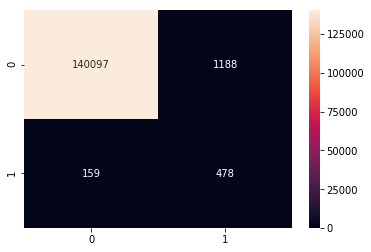

tronador


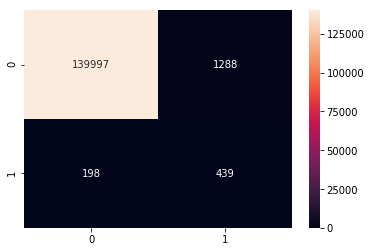

In [44]:
print("model")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["prediction"] > 0.55)
print("tronador")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["es_gte_5"])

In [54]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["TIPO_EXPED"]], [df_pred["prediction"] > 0.6])

prediction                False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1.0           693      1
              2.0         10350      3
              3.0         61073      0
              10.0        55490      0
              20.0         1859      0
              50.0         1665     15
              60.0         9340    796
True          1.0             2      0
              2.0             8      1
              3.0             3      0
              10.0            5      2
              20.0            1      2
              50.0           37      4
              60.0          139    433

In [55]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["TIPO_EXPED"]], [df_pred["es_gte_5"]])

es_gte_5                  False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1.0           689      5
              2.0         10272     81
              3.0         61063     10
              10.0        55488      2
              20.0         1859      0
              50.0         1263    417
              60.0         9363    773
True          1.0             2      0
              2.0             9      0
              3.0             3      0
              10.0            7      0
              20.0            3      0
              50.0           30     11
              60.0          144    428

model


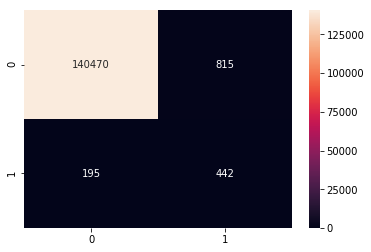

tronador


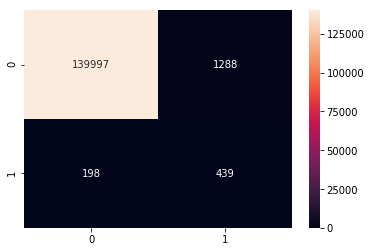

In [62]:
print("model")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["prediction"] > 0.6)
print("tronador")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["es_gte_5"])

mes: 1.0


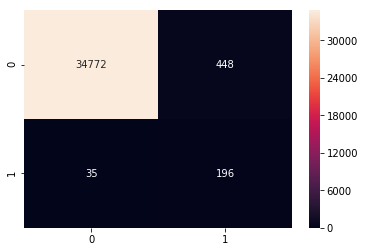

mes: 2.0


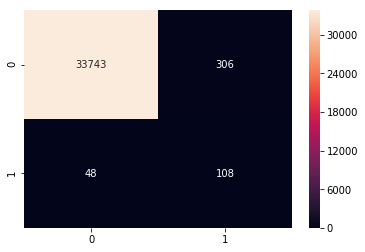

mes: 3.0


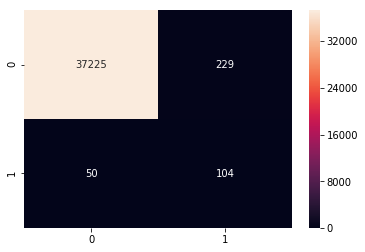

mes: 4.0


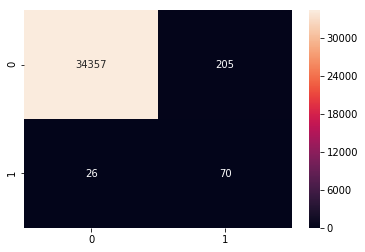

In [41]:
for m in df_pred["mes"].unique():
    tmp = df_pred[(df_pred["mes"] == m)]
    print(f"mes: {m}")
    confusion_matrix_plot(tmp["EXISTE_FRAUDE"], tmp["prediction"] > 0.55)

Tronador mes: 1.0


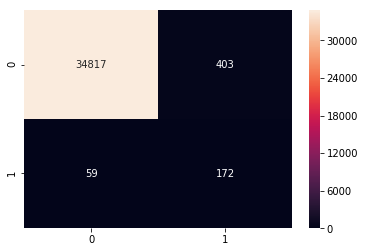

Tronador mes: 2.0


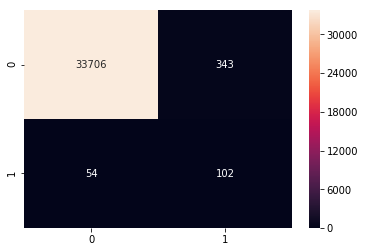

Tronador mes: 3.0


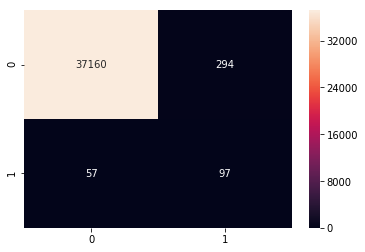

Tronador mes: 4.0


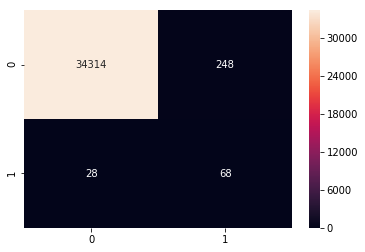

In [40]:
for m in df_pred["mes"].unique():
    tmp = df_pred[df_pred["mes"] == m]
    print(f"Tronador mes: {m}")
    confusion_matrix_plot(tmp["EXISTE_FRAUDE"], tmp["es_gte_5"])

Predicción con %30.0


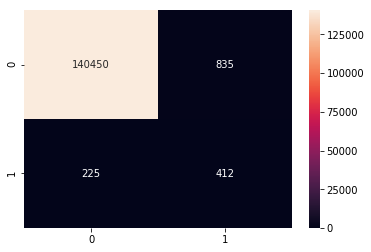

Predicción con %35.0


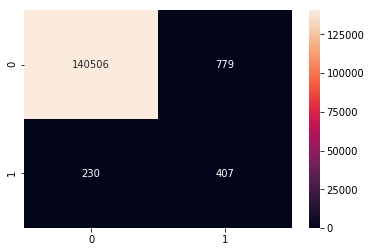

Predicción con %40.0


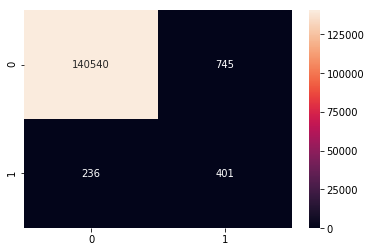

Predicción con %45.0


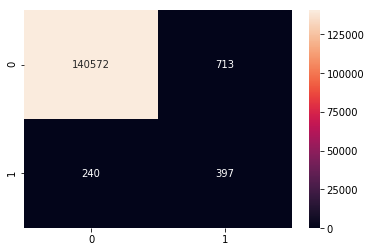

Predicción con %50.0


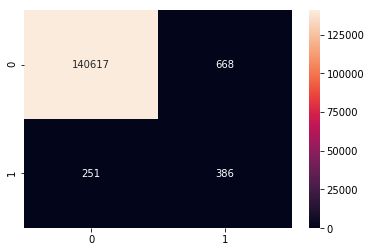

Predicción con %55.0


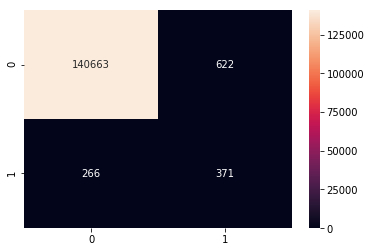

Predicción con %60.0


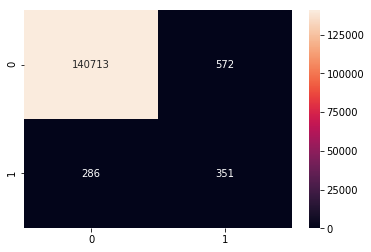

Predicción con %65.0


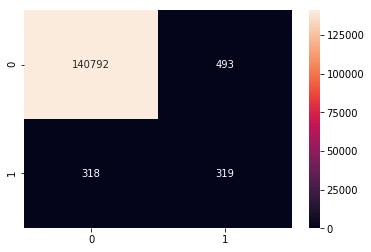

Predicción con %70.0


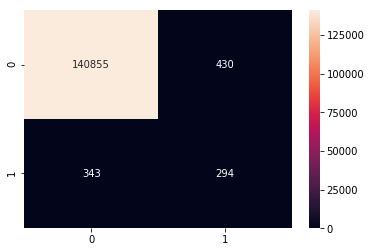

Predicción con %75.0


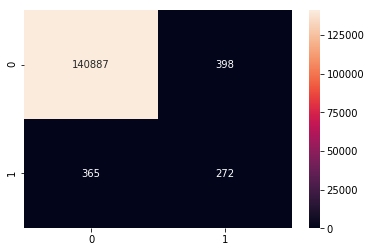

Predicción con %80.0


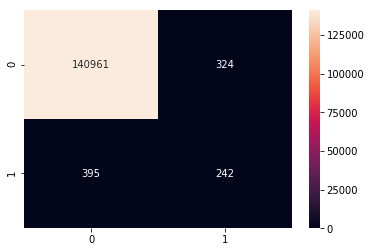

Predicción con %85.0


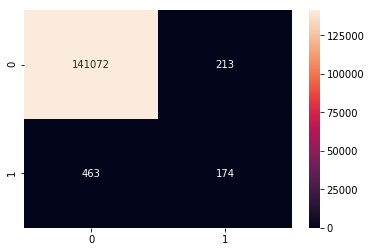

Predicción con %90.0


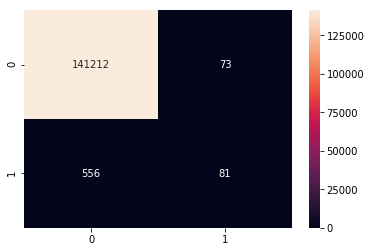

Predicción con %95.0


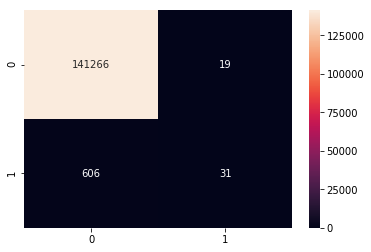

Predicción con %100.0


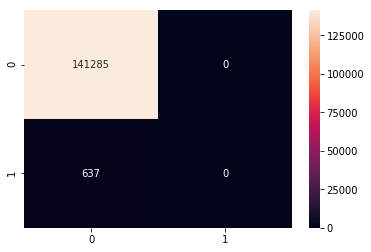

In [18]:
for p in np.arange(0.3, 1.05, 0.05):
    print(f"Predicción con %{round(p* 100,0)}")
    confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["prediction"] > p)

## Sin mes 1

In [33]:
df_pred = df_pred[(df_pred["mes"] > 1)]

In [34]:
df_pred["mes"].value_counts()

3.0    37608
4.0    34658
2.0    34205
Name: mes, dtype: int64

model


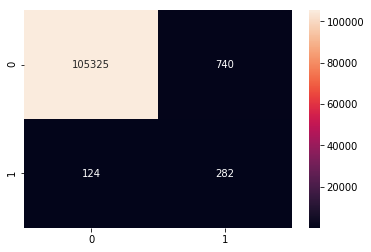

tronador


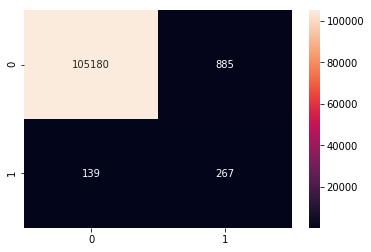

In [35]:
print("model")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["prediction"] > 0.55)
print("tronador")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["es_gte_5"])

In [36]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["TIPO_EXPED"]], [df_pred["prediction"] > 0.55])

prediction                False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1.0           554      0
              2.0          7946      3
              3.0         46989      0
              10.0        40696      0
              20.0         1366      0
              50.0         1205     71
              60.0         6569    666
True          1.0             2      0
              2.0             7      0
              3.0             3      0
              10.0            5      0
              20.0            1      0
              50.0           26      7
              60.0           80    275

In [37]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["TIPO_EXPED"]], [df_pred["es_gte_5"]])

es_gte_5                  False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1.0           549      5
              2.0          7902     47
              3.0         46982      7
              10.0        40695      1
              20.0         1366      0
              50.0          947    329
              60.0         6739    496
True          1.0             2      0
              2.0             7      0
              3.0             3      0
              10.0            5      0
              20.0            1      0
              50.0           23     10
              60.0           98    257

## Distinto % pred por tipos

In [29]:
df_pred["prediction_aj"] = df_pred["prediction"]

In [30]:
# gte 4
porc = 0.5
df_pred.loc[df_pred[(df_pred["TIPO_EXPED"] == 50) & (df_pred["prediction"] >= porc)].index, "prediction_aj"] = 1

In [ ]:
# lw4 g1
porc = 0.45
df_pred.loc[df_pred[(df_pred["TIPO_EXPED"] >= 50) & (df_pred["total_condicion"] < 4)].index, "prediction_aj"] = df_pred.loc[df_pred[(df_pred["TIPO_EXPED"] >= 50) & (df_pred["total_condicion"] >= 4)].index, "prediction_aj"] > porc

model


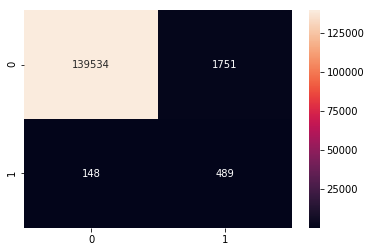

tronador


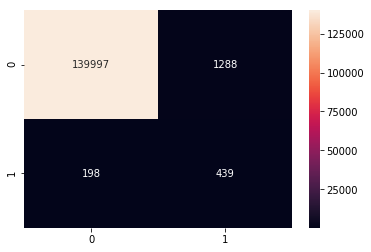

In [31]:
print("model")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["prediction_aj"] > 0.55)
print("tronador")
confusion_matrix_plot(df_pred["EXISTE_FRAUDE"], df_pred["es_gte_5"])

In [32]:
pd.crosstab([df_pred["EXISTE_FRAUDE"], df_pred["TIPO_EXPED"]], [df_pred["prediction_aj"] > 0.55])

prediction_aj             False  True 
EXISTE_FRAUDE TIPO_EXPED              
False         1.0           693      1
              2.0         10350      3
              3.0         61073      0
              10.0        55490      0
              20.0         1859      0
              50.0         1008    672
              60.0         9061   1075
True          1.0             2      0
              2.0             8      1
              3.0             3      0
              10.0            5      2
              20.0            1      2
              50.0           21     20
              60.0          108    464